# Verify Data loading

S1A_IW_GRDH_1SDV_20170802T163350_34TCR_28_12 S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_28_12 7180 7180


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


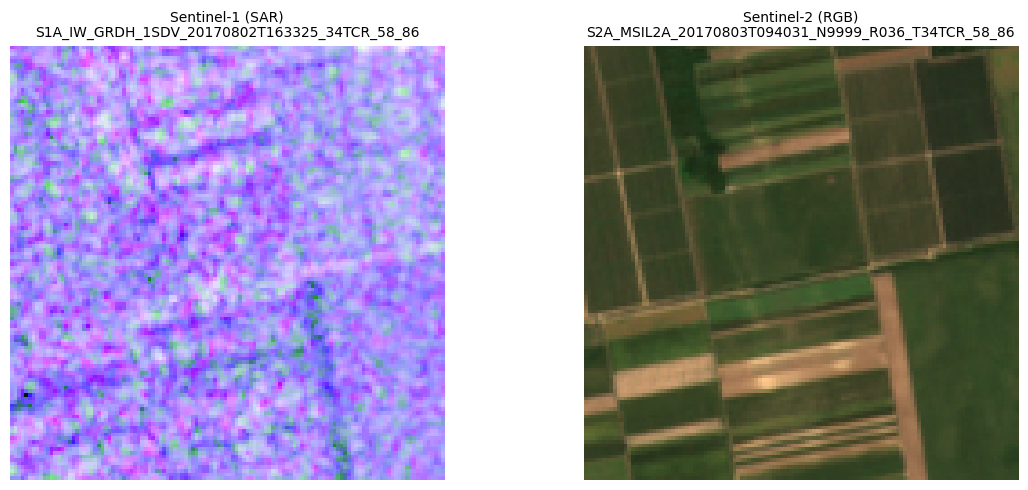

In [1]:
from data_loading_v2 import MultiChannelDataset
import torchvision.transforms.v2 as v2
from transforms import make_transforms

dataset_root1 = '/Users/narendraaironi/projects/biplab/JEPA/data/BEN_14k/BigEarthNet-S1'
dataset_root2 = '/Users/narendraaironi/projects/biplab/JEPA/data/BEN_14k/BigEarthNet-S2'
metadata = '/Users/narendraaironi/projects/biplab/JEPA/data/BEN_14k/serbia_metadata.parquet'

transform = make_transforms(12)
train_ds = MultiChannelDataset(dataset_root1, dataset_root2, metadata, 'train', transform)

print(train_ds.metadata1[0], train_ds.metadata2[0], len(train_ds.metadata1), len(train_ds.metadata2))

fig = train_ds.plot(456)



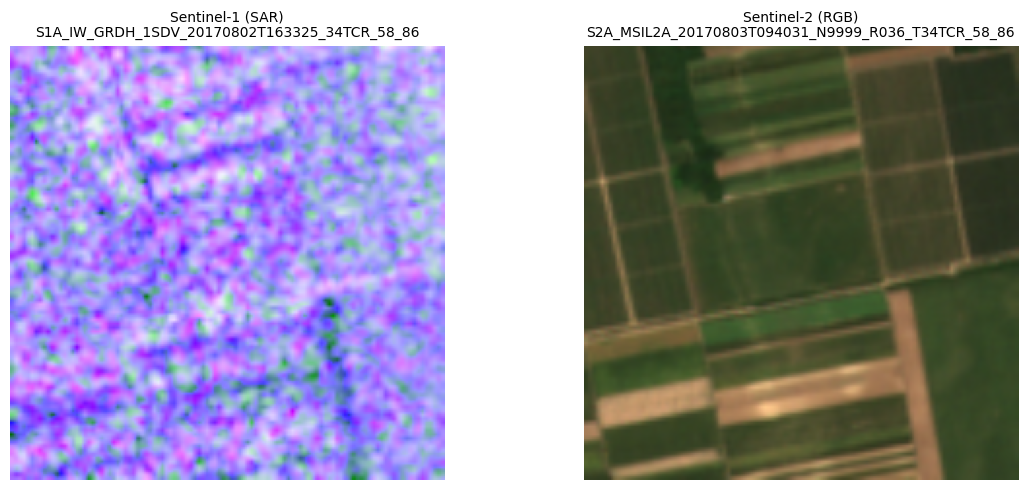

In [7]:
import matplotlib.pyplot as plt
import numpy as np

idx = 456
s1_img, s2_img = train_ds[idx]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
vv = s1_img[0]  # VV polarization
vh = s1_img[1]  # VH polarization

vv_norm = (vv - vv.min()) / (vv.max() - vv.min())
vh_norm = (vh - vh.min()) / (vh.max() - vh.min())

vv_vh_ratio = np.clip(vv_norm / (vh_norm + 1e-10), 0, 1)
s1_rgb = np.stack([vv_norm, vh_norm, vv_vh_ratio], axis=-1)

axes[0].imshow(s1_rgb)
axes[0].set_title(f'Sentinel-1 (SAR)\n{train_ds.metadata1[idx]}', fontsize=10)
axes[0].axis('off')

rgb = s2_img[[2, 1, 0], :, :]  # Convert BGR to RGB

rgb_norm = rgb / rgb.max()
rgb_norm = np.transpose(rgb_norm, (1, 2, 0))  # CHW to HWC

axes[1].imshow(rgb_norm)
axes[1].set_title(f'Sentinel-2 (RGB)\n{train_ds.metadata2[idx]}', fontsize=10)
axes[1].axis('off')

plt.tight_layout()
